# Topics in Quantitative Finance - Homework 4

Assigned: July 30, 2024.
Due: **August 01, 2024 by 1PM**. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to TA丁宏駿 at [dinghongjun@stu.pku.edu.cn](mailto:dinghongjun@stu.pku.edu.cn) by the due date and time.  All codes must run correctly and solutions must be written up neatly in Markdown/LaTeX format. If you encounter problems with Jupyter notebook, please contact [丁宏駿](dinghongjun@stu.pku.edu.cn).

## Name: <font color=blue>刘任达</font>

### Set up `python` environment

The following two cells load required `python` code into the notebook for the homework.

In [1]:
# import required modules
import datetime
from datetime import datetime as dt
import numpy as np
from numpy import exp, log, sqrt
import scipy.stats as ss
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from option_analytics import OptionAnalytics

## Historical volatility

In [2]:
# load daily OHLC data for Tesla from 2020-09-01 to 2024-07-26
tsla = pd.read_csv('tsla_07292024.csv')
tsla.index = tsla['Date']
tsla = tsla.drop('Date', axis=1)

In [3]:
# a quick look at the data
tsla

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-09-01  167.380005  167.496674  156.836670  158.350006  158.350006   
2020-09-02  159.663330  159.679993  135.039993  149.123337  149.123337   
2020-09-03  135.743332  143.933334  134.000000  135.666672  135.666672   
2020-09-04  134.270004  142.666672  124.006668  139.440002  139.440002   
2020-09-08  118.666664  122.913330  109.959999  110.070000  110.070000   
...                ...         ...         ...         ...         ...   
2024-07-22  244.210007  253.210007  243.750000  251.509995  251.509995   
2024-07-23  253.600006  255.759995  245.630005  246.380005  246.380005   
2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
2024-07-26  221.190002  222.279999  215.330002  219.800003  219.800003   

               Volume  
Date                   
2020-09-01  269523300  
2020-09-02  288528300  
2020-09-03  262788300  
2020-09-04  330965700  
2020-09-08  346397100  
...               ...  
2024-07-22  101225400  
2024-07-23  111928200  
2024-07-24  167942900  
2024-07-25  100636500  
2024-07-26   94483000  

[981 rows x 6 columns]

### 1. (15pts)

Use the `python` code provided in the lecture, especially the part on historical volatilities, to 
- a) plot daily close prices and daily log returns (using close prices) of Tesla in this period of time;
- b) calculate the followinig historical volatilities with moving window of 15 days: i) conditional standard deviation of log returns from close price, ii) Parkinson, iii) Garman-Klass, iv) Rogers-Satchell, by using the daily OHLC data stored in `tsla_07292024.csv`. Plot all the volatilities in one figure;
- c) illustrate the leverage effect by plotting the historical volatility series from b)i) and the price series in the same figure. Remember to properly rescale the price series. 

### <font color=blue>Solution 1.</font>

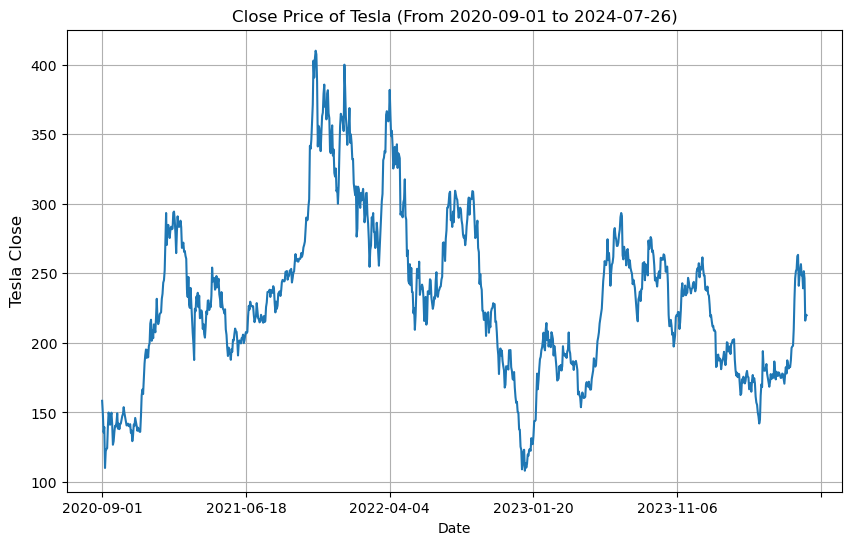

In [8]:
# (1a) plot tsla close prices

plt.figure(figsize=(10, 6))
tsla['Close'].plot()
plt.ylabel('Tesla Close', fontsize=12)
plt.title('Close Price of Tesla (From ' + str(tsla.index[0]) + ' to ' + str(tsla.index[-1]) + ')')
plt.grid();

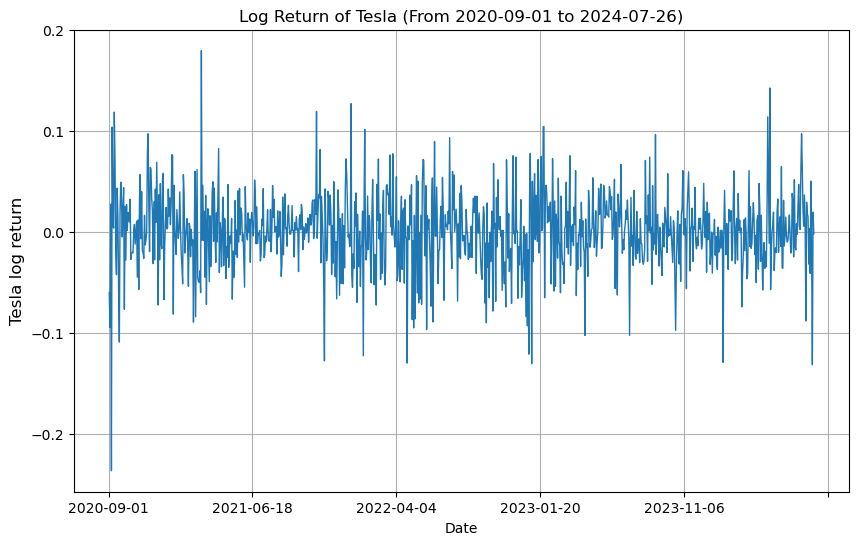

In [7]:
# (1a) log returns of tsla 

r = log(tsla['Close']).diff()

# historical volatility in this period
vol = r.std()*sqrt(252)

# plot log return
plt.figure(figsize=(10, 6))
r.plot(lw=1)
plt.ylabel('Tesla log return', fontsize=12)
plt.title('Log Return of Tesla (From ' + str(r.index[0]) + ' to ' + str(r.index[-1]) + ')')
plt.grid();

In [10]:
#(1b)
# Volatilites python class from lecture  
class Volatilities:
    def __init__(self, OHLC, n=10, N=252):
        self.n = n
        self.N = N
        self.OHLC = pd.DataFrame(OHLC)
        self.o = self.OHLC.Open
        self.h = self.OHLC.High
        self.l = self.OHLC.Low
        self.c = self.OHLC.Close
        self.r = log(self.OHLC['Close']).diff()
        self.vols_c = [np.nan for i in range(self.n)] 
        self.vols_p = [np.nan for i in range(self.n)]
        self.vols_gk = [np.nan for i in range(self.n)] 
        self.vols_rs = [np.nan for i in range(self.n)] 
        
        for i in range(len(self.r) - self.n):
            self.vols_c += [self.r.iloc[i:(i+self.n)].std()*sqrt(self.N)]
            self.vols_p += [self.cal_vol_p(self.h.iloc[i:(i+self.n)], self.l.iloc[i:(i+self.n)])*sqrt(self.N)]
            self.vols_gk += [self.cal_vol_gk(self.o.iloc[i:(i+self.n)], self.h.iloc[i:(i+self.n)], self.l.iloc[i:(i+self.n)], self.c.iloc[i:(i+self.n)])*sqrt(self.N)]
            self.vols_rs += [self.cal_vol_rs(self.o.iloc[i:(i+self.n)], self.h.iloc[i:(i+self.n)], self.l.iloc[i:(i+self.n)], self.c.iloc[i:(i+self.n)])*sqrt(self.N)]
        self.vols = pd.DataFrame({'close': self.vols_c, 'parkinson': self.vols_p, 'garman-klass': self.vols_gk, 'rogers-satchell': self.vols_rs})
        self.vols.index = self.OHLC.index
        
    def cal_vol_p(self, H, L):
        return np.sqrt(((log(H) - log(L))**2).mean()/log(2)/4)
    
    def cal_vol_gk(self, O, H, L, C):
        term1 = ((log(O) - log(L))**2).mean()/2
        term2 = (2*log(2) - 1)*((log(C) - log(O))**2).mean()
        return np.sqrt(term1 + term2)
    
    def cal_vol_rs(self, O, H, L, C):
        u, d, c = log(H) - log(O), log(L) - log(O), log(C) - log(O)
        return np.sqrt((u*(u-c)).mean() + (d*(d-c)).mean())

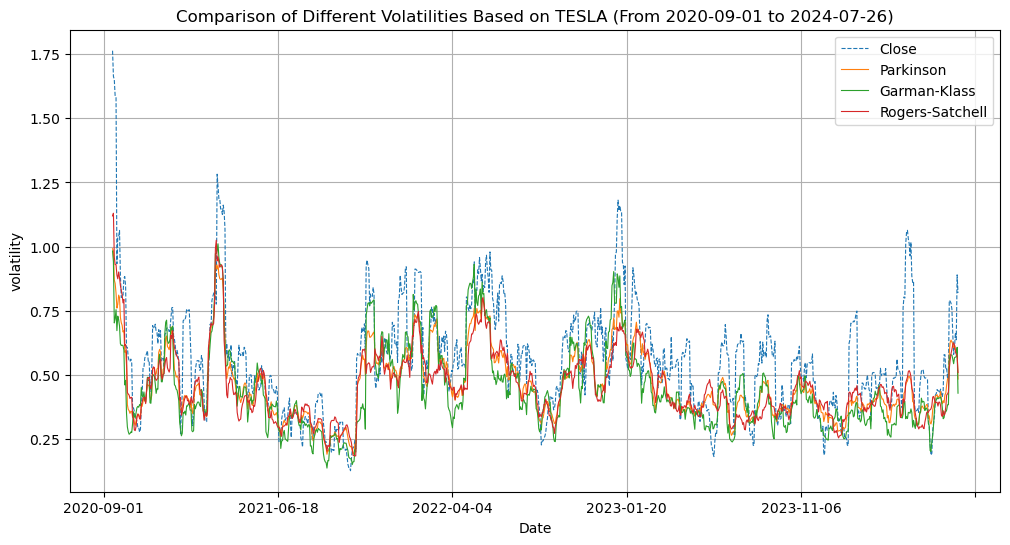

In [21]:
# (1b) continued
# calculate volatilities using historical data

tsla_vols = Volatilities(tsla)

plt.figure(figsize=(12, 6))
tsla_vols.vols['close'].plot(ls='--', lw=0.8, label='Close')
tsla_vols.vols['parkinson'].plot(lw=0.8, label='Parkinson')
tsla_vols.vols['garman-klass'].plot(lw=0.8, label='Garman-Klass')
tsla_vols.vols['rogers-satchell'].plot(lw=0.8, label='Rogers-Satchell')
plt.ylabel('volatility')
plt.title('Comparison of Different Volatilities Based on TESLA (From ' + str(tsla.index[0]) + ' to ' + str(tsla.index[-1]) + ')')
plt.legend()
plt.grid();

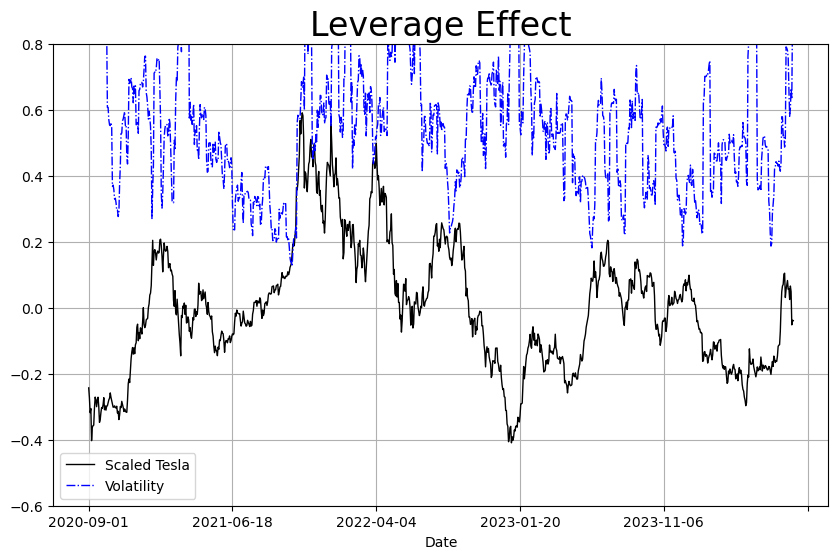

In [22]:
# (1c)
# leverage effect
def volatility(data, n=10, N=252):
    data = pd.Series(data)
    vol = [np.nan for i in range(n)]
    for i in range(len(data)-n):
        vol += [data.iloc[i:(i+n)].std()*sqrt(N)]
    return pd.DataFrame({'volatility': vol})

tsla_vol = volatility(r)
tsla_vol.index = tsla.index

tsla_scaled = (tsla - tsla.mean())/(tsla.max() - tsla.min())
plt.figure(figsize=(10, 6))
tsla_scaled['Close'].plot(color='k', lw=1, label='Scaled Tesla')
plt.ylim([-0.6, 0.8])
plt.plot(tsla_vol, 'b-.', lw=1, label='Volatility')
plt.grid()
plt.title('Leverage Effect', fontsize=24)
plt.legend();

## Implied volatility and VIX calculation

In [23]:
# load the saved data, previously downloaded from yahoo finance
aapl_calls = pd.read_csv('aapl_call_07252022.csv')
aapl_puts = pd.read_csv('aapl_put_07252022.csv')
today, expiry = '2022-07-25', '2022-08-26' 

In [35]:
# a look at the first few rows of the data
aapl_calls.head()

contractSymbol        lastTradeDate  strike  lastPrice    bid    ask  \
0  AAPL220826C00070000  2022-07-21 15:28:15    70.0      83.60  83.05  83.20   
1  AAPL220826C00105000  2022-07-20 16:14:10   105.0      48.69  48.10  48.25   
2  AAPL220826C00110000  2022-07-20 17:09:38   110.0      42.77  43.20  43.35   
3  AAPL220826C00120000  2022-07-22 19:24:02   120.0      34.81  33.40  33.55   
4  AAPL220826C00125000  2022-07-22 18:50:21   125.0      29.50  28.45  28.75   

   change  percentChange  volume  openInterest  impliedVolatility  inTheMoney  
0     0.0            0.0     6.0             2           1.074223        True  
1     0.0            0.0    10.0             6           0.588871        True  
2     0.0            0.0    20.0            21           0.572270        True  
3     0.0            0.0    11.0            18           0.512212        True  
4     0.0            0.0     1.0            34           0.477056        True

In [25]:
# a look at the last few rows of the data
aapl_puts.tail()

contractSymbol        lastTradeDate  strike  lastPrice    bid    ask  \
36  AAPL220826P00170000  2022-07-22 17:45:40   170.0      16.75  17.45  17.60   
37  AAPL220826P00180000  2022-07-19 19:40:09   180.0      29.35  26.95  27.15   
38  AAPL220826P00185000  2022-07-15 16:30:49   185.0      36.25  32.05  32.10   
39  AAPL220826P00190000  2022-07-21 18:24:42   190.0      34.75  36.90  37.10   
40  AAPL220826P00250000  2022-07-22 17:35:11   250.0      96.40  96.95  97.20   

    change  percentChange  volume  openInterest  impliedVolatility  inTheMoney  
36     0.0            0.0     3.0            16           0.274665        True  
37     0.0            0.0  1000.0           150           0.293952        True  
38     0.0            0.0     1.0             2           0.317390        True  
39     0.0            0.0   520.0           402           0.354499        True  
40     0.0            0.0     1.0             1           0.686527        True

### 2. (20pts)

Use the codes provided in lecture, especially the part on implied volatility, to 
- a) determine if there exist arbitrage opportunities in this dataset, explain your answer;
- b) calculate the implied volatilities for AAPL using option data stored in `aapl_call_07252022.csv` and `aapl_put_07252022.csv`;
- c) plot the implied volatilities versus logmoneyness; 
- d) use this dataset and the VIX formula to calculate the volatility index for AAPL.

### <font color=blue>Solution 2.</font>

c:\Users\20249\Desktop\MY PkU\通识课、英语课and other lessons\Topics_in_Quantative_Finance_24summer\NSDHW04_Summer2024\option_analytics.py:104: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s_adj, pv = result.params[0], -result.params[1]


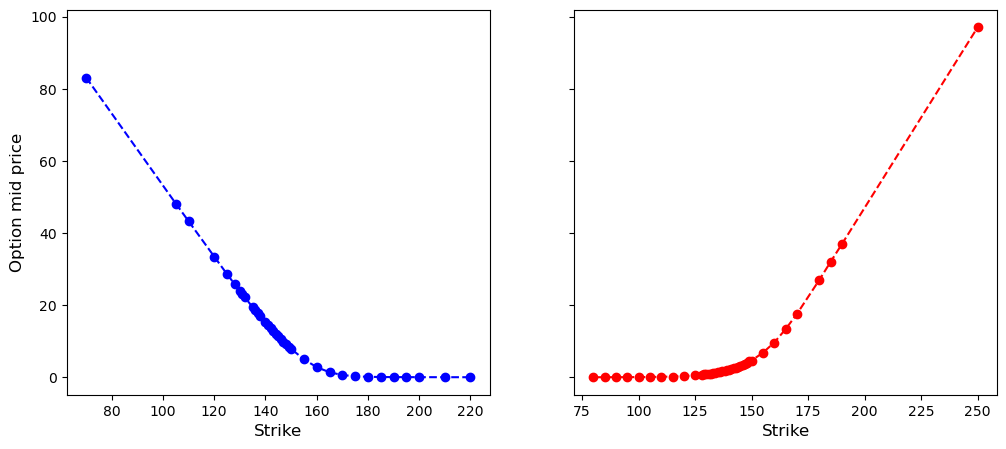

In [27]:
#(2a)
aapl_opt = OptionAnalytics([aapl_calls, aapl_puts], expiry, today)
aapl_opt.plot_arb()

There cannot be an arbitrage opportunity. That's because the mid price-strike plot forms a smooth curve for both calls and puts. Moreover, the diagram below shows that $C-P$ exhibits a strong linear correlation with strike price $K$. This checks the put-call parity.

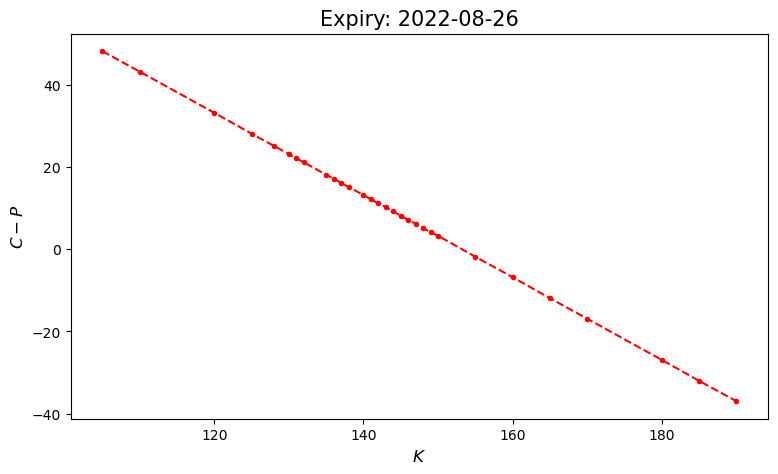

In [28]:
aapl_opt.plot_parity()

In [44]:
#(2b)
aapl_opt.imp_vols()['imp_vols']

c:\Users\20249\Desktop\MY PkU\通识课、英语课and other lessons\Topics_in_Quantative_Finance_24summer\NSDHW04_Summer2024\option_analytics.py:104: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s_adj, pv = result.params[0], -result.params[1]


array([0.50833659, 0.5365281 , 0.48150332, 0.44203581, 0.43503084,
       0.42753686, 0.41911839, 0.41951208, 0.40484517, 0.40309294,
       0.40237123, 0.39815818, 0.38875316, 0.38352051, 0.3773059 ,
       0.38053163, 0.37379497, 0.36770762, 0.36214258, 0.36002843,
       0.35363233, 0.34899143, 0.34736538, 0.32256559, 0.30242981,
       0.28603332, 0.27588929, 0.2806888 , 0.29279635, 0.31061329])

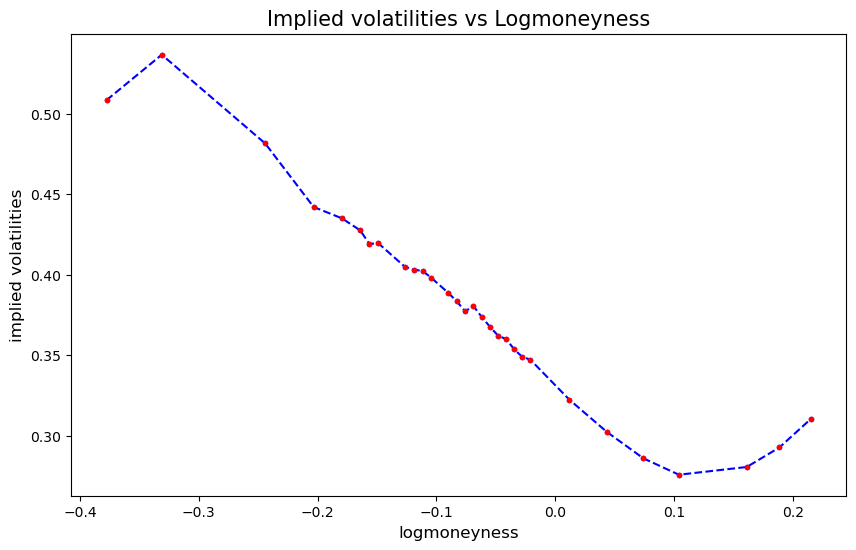

In [32]:
#(2c) plot implied vol vs logmoneyness

aapl_opt.plot_imp_vols2()

#### 2d. Volatility Index (VIX) calculation

VIX definition in the CBOE white paper:

$$VIX^2=\frac{2}{T}\, \textcolor{orange}{\sum_i\,\frac{\Delta K_i}{K_i^2}\,Q_i(K_i) } \,-\,\frac{1}{T}\,\textcolor{lime}{\left[\frac{F}{K_0}-1\right]^2}
$$

where $Q_i$ is the price of the out-of-the-money option with strike
$K_i$ and $K_0$ is the highest strike below the forward price $F$. $T$ is one month.

In [47]:
# (2d) 
# recall the VIX formula
# VIX^2 = 2/T sum_i (Delta K_i)/Ki^2 Qi(Ki) - 1/T (F/K0 - 1)^2, 
# where Q denotes prices of out-of-money options, F the forward price,  
# and K0 the largest strike smaller than F

aapl_calls_o = aapl_calls[aapl_calls['inTheMoney'] == False]
aapl_puts_o = aapl_puts[aapl_puts['inTheMoney'] == False]

puts_calls = pd.concat([aapl_puts_o, aapl_calls_o], axis = 0) #合成成表
puts_calls = puts_calls.reset_index(drop = True)

sum = 0

for i in (puts_calls['strike'].index): #ORANGE PART
    if i == 0:
        dK = puts_calls['strike'][1] - puts_calls['strike'][0]
    elif i == len(puts_calls['strike']) - 1:
        dK = puts_calls['strike'][i] - puts_calls['strike'][i - 1]
    else:
        dK = (puts_calls['strike'][i + 1] - puts_calls['strike'][i - 1]) / 2
    Q = (puts_calls['bid'][i] + puts_calls['ask'][i]) / 2
    sum += dK * Q / (puts_calls['strike'][i] ** 2)

#GREEN PART
F = aapl_opt.imp_vols()['s_adj']/aapl_opt.imp_vols()['pv'] #由于无风险利率r的缺失，这一步使用regression中的结果
T = 1/12

VIX_squared = 2 / T * sum - 1 / T * ((F / aapl_puts_o['strike'].max()) - 1)** 2

print(np.sqrt(VIX_squared))

0.35723265517720043


c:\Users\20249\Desktop\MY PkU\通识课、英语课and other lessons\Topics_in_Quantative_Finance_24summer\NSDHW04_Summer2024\option_analytics.py:104: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s_adj, pv = result.params[0], -result.params[1]
